Exercice 1: PageRank on Harvard Data.

In [1]:
import scipy.io
import matplotlib.pyplot as plt
import scipy.sparse as sps
import pandas as pd
import networkx as nx
import numpy as np


#Import data
mat=scipy.io.loadmat("C:/Users/victo/Downloads/Exercise_1/Harvard500.mat")
#print(mat)
Pb=mat['Problem']
nodename=mat['Problem']['aux'][0,0][0,0][0]
print(Pb)
#print(type(mat))
#print(type(Pb))
#pint(Pb.shape)
#print(Pb['A'][0,0])










[[(array(['MathWorks/Harvard500'], dtype='<U20'), array(['Web matrix (Numerical Computing with MATLAB, Moler, 2004)'],
      dtype='<U57'), <500x500 sparse matrix of type '<class 'numpy.float64'>'
	with 2636 stored elements in Compressed Sparse Column format>, array([[1172]], dtype=uint16), array(['directed graph'], dtype='<U14'), array([[(array(['http://www.harvard.edu                                                                       ',
       'http://atwork.harvard.edu                                                                    ',
       'http://lib.harvard.edu                                                                       ',
       'http://www.president.harvard.edu                                                             ',
       'http://www.athletics.harvard.edu                                                             ',
       'http://www.haa.harvard.edu                                                                   ',
       'http://search.harvard.edu:

The adjacency matrix of this graph is A_ij=1 if j->i


In [48]:
A=Pb['A'][0,0]
A=A.toarray()
#print(len(A),len(A[1]))

Visualize the sparsity structure of the graph

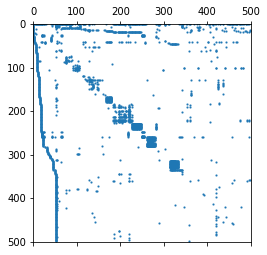

In [49]:
plt.spy(sps.csr_matrix(A),markersize=1)

plt.show()

Create Matrix + first test on pg

In [50]:
PdA=pd.DataFrame(A)
G=nx.from_pandas_adjacency(PdA)
print(nx.info(G))


Name: 
Type: Graph
Number of nodes: 500
Number of edges: 2116
Average degree:   8.4640


In [55]:
#Pagerank function of networkx library, permite to test the veracity of the code
#Pg=nx.pagerank(G,0.95, tol=1e-4)

tol=1e-4
alpha=0.95
D=nx.to_directed(G)
W=nx.stochastic_graph(D)
print(nx.info(W))
N=W.number_of_nodes()


x=dict.fromkeys(W,1.0/N)
p=dict.fromkeys(W,1.0/N)

dangling_weight=p
dangling_nodes = [n for n in W if W.out_degree(n) == 0.0] 


for _ in range(100): 
    xlast = x 
    x = dict.fromkeys(xlast.keys(), 0) 
    danglesum = alpha * sum(xlast[n] for n in dangling_nodes) 
    for n in x:
        
    # this matrix multiply looks odd because it is 
    # doing a left multiply x^T=xlast^T*W 
        for nbr in W[n]: 
            x[nbr] += alpha * xlast[n]*W[n][nbr]['weight']
        x[n] += danglesum * dangling_weight[n] + (1.0 - alpha) * p[n] 
  
    # check convergence, l1 norm 
    err = sum([abs(x[n] - xlast[n]) for n in x])
    #print(err)
    #print(N*tol)
    if err < N*tol: 
        #print(x)
        break

#Check with PageRank Networkx Function
#print(Pg)

#Display
for i in range(len(nodename)):
    print(nodename[i],x[i])
    


Name: 
Type: DiGraph
Number of nodes: 500
Number of edges: 4159
Average in degree:   8.3180
Average out degree:   8.3180
http://www.harvard.edu                                                                        0.05376144768407083
http://atwork.harvard.edu                                                                     0.003200321496738972
http://lib.harvard.edu                                                                        0.010345578027386265
http://www.president.harvard.edu                                                              0.003574542042529624
http://www.athletics.harvard.edu                                                              0.0027141954178884404
http://www.haa.harvard.edu                                                                    0.0035368516011862654
http://search.harvard.edu:8765                                                                0.006310217638113741
http://www.fas.harvard.edu                                               

Matrix vector product function

In [52]:
def matrixvectorprod(mat,vect):
    return mat.dot(vect)

#Test
a = np.array([[ 5, 1 ,3], 
                  [ 1, 1 ,1], 
                  [ 1, 2 ,1]])
b = np.array([1, 2, 3])

print(matrixvectorprod(a,b))


[16  6  8]


In [ ]:
# Centrality function ???